<a href="https://colab.research.google.com/github/mmohammadi9812/nma-beloved-scabiosa-pg1/blob/main/fmri/load_kay_fmri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Download the data

import os, requests
from pathlib import Path

fnames = ["kay_labels.npy", "kay_labels_val.npy", "kay_images.npz"]
urls = ["https://osf.io/r638s/download",
        "https://osf.io/yqb3e/download",
        "https://osf.io/ymnjv/download"]

for fname, url in zip(fnames, urls):
  if not Path('../data/' + fname).exists():
    try:
      r = requests.get(url, proxies=dict(http=os.getenv('HTTPS_PROXY'), https=os.getenv('HTTPS_PROXY')))
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        print(f"Downloading {fname}...")
        with open(fname, "wb") as fid:
          fid.write(r.content)
        print(f"Download {fname} completed!")

In [3]:
with np.load("../data/kay_images.npz") as dobj:
  dat = dict(**dobj)
labels = np.load("../data/kay_labels.npy")
val_labels = np.load("../data/kay_labels_val.npy")


`labels` is a 4 by stim array of class names:  
- row 3 has the labels predicted by a deep neural network (DNN) trained on Imagenet
- rows 0-2 correspond to different levels of the wordnet hierarchy for the DNN predictions

In [4]:
print(labels[:, :4])

[['artifact' 'entity' 'animal' 'animal']
 ['instrumentality' 'round shape' 'vertebrate' 'vertebrate']
 ['equipment' 'sphere' 'mammal' 'amphibian']
 ['croquet ball' 'bubble' 'komondor' 'tailed frog']]


In [5]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


`dat` has the following fields:  
- `stimuli`: stim x i x j array of grayscale stimulus images
- `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set  
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

In [6]:
print(dat["stimuli"].shape)

(1750, 128, 128)


In [7]:
print(dat["responses"].shape)

(1750, 8428)


This is the number of voxels in each ROI. Note that `"Other"` voxels have been removed from this version of the dataset:

In [8]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))

{np.str_('Other'): np.int64(0),
 np.str_('V1'): np.int64(1294),
 np.str_('V2'): np.int64(2083),
 np.str_('V3'): np.int64(1790),
 np.str_('V3A'): np.int64(484),
 np.str_('V3B'): np.int64(314),
 np.str_('V4'): np.int64(1535),
 np.str_('LatOcc'): np.int64(928)}

Each stimulus is a 128 x 128 grayscale array:

/var/folders/m8/p03y8zyd2gv8yyhn52vcryvw0000gn/T/ipykernel_33346/3506099172.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


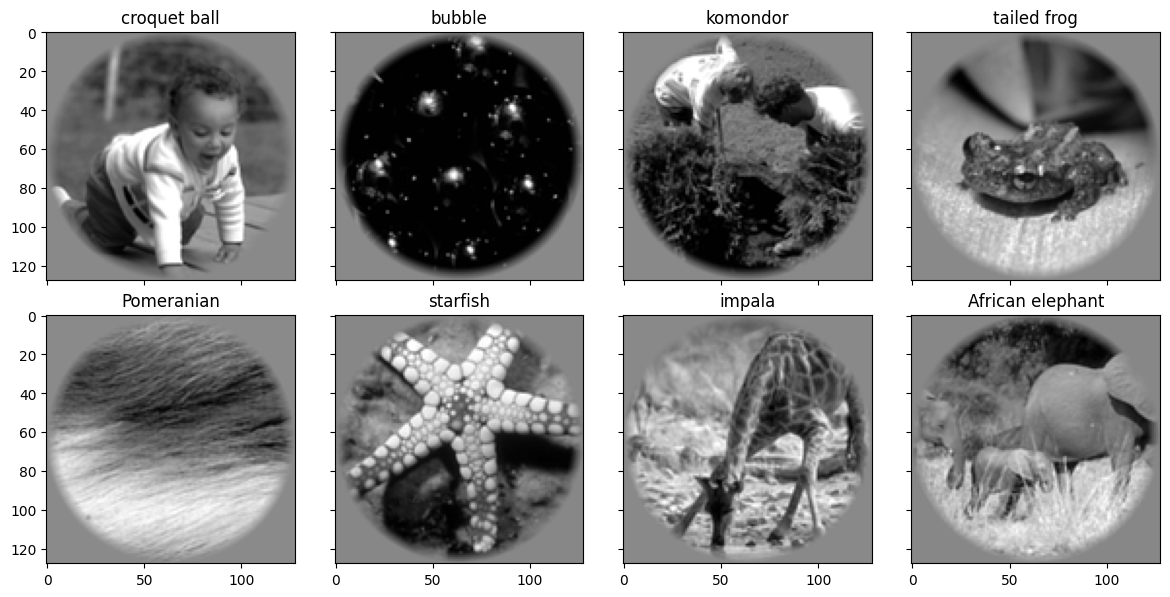

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im, lbl in zip(axs.flat, dat["stimuli"], labels[-1, :]):
  ax.imshow(im, cmap="gray")
  ax.set_title(lbl)
fig.tight_layout()
fig.show()

Each stimulus is associated with a pattern of BOLD response across voxels in visual cortex:

/var/folders/m8/p03y8zyd2gv8yyhn52vcryvw0000gn/T/ipykernel_33346/2625672689.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


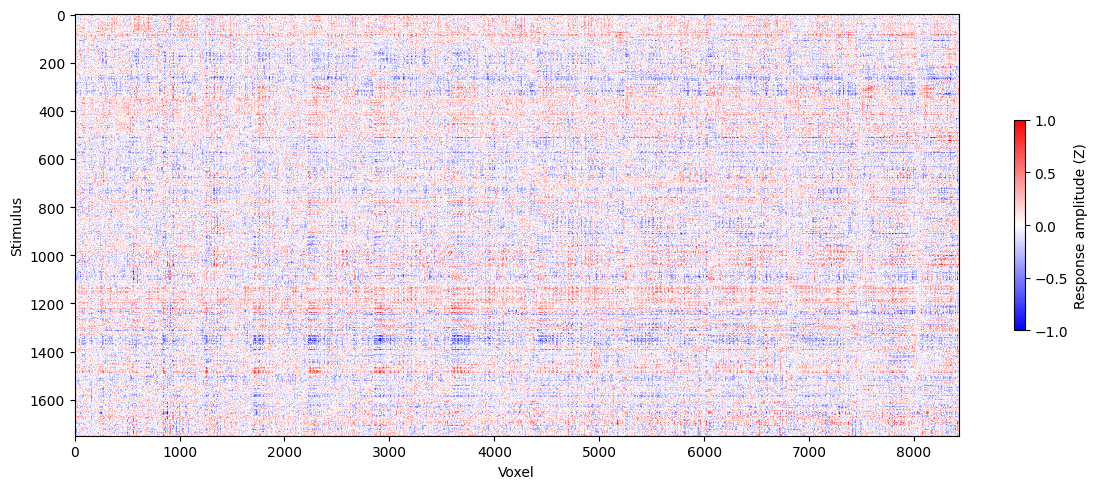

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"],
                    aspect="auto", vmin=-1, vmax=1, cmap="bwr")
fig.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
fig.tight_layout()
fig.show()

In [11]:
dat['stimuli'].shape

(1750, 128, 128)

In [12]:
dat['responses'].shape

(1750, 8428)

In [13]:
unique, counts = np.unique(dat['roi'], return_counts=True)
counts

array([1294, 2083, 1790,  484,  314, 1535,  928])

In [14]:
np.bincount(dat['roi'])

array([   0, 1294, 2083, 1790,  484,  314, 1535,  928])

In [15]:
dat['roi_names']

array(['Other', 'V1', 'V2', 'V3', 'V3A', 'V3B', 'V4', 'LatOcc'],
      dtype='<U6')

In [16]:
n_images = dat['stimuli'].shape[0]
responses = np.array([])

# dat['responses'][0]
# np.extract(dat['roi'] == 1, dat['responses'][0])

for i in range(n_images):
  image_responses = dict(zip(dat["roi_names"], np.bincount(dat["roi"])))
  for j, k in enumerate(image_responses.keys()):
    if j == 0: continue
    image_responses[k] = np.extract(dat['roi'] == j, dat['responses'][i])
  responses = np.append(responses, image_responses)

print(responses.shape)


(1750,)


In [1]:
if not Path("../data/responses.npy").exists():
    np.save("../data/responses.npy", responses)


NameError: name 'Path' is not defined